In [1]:
! pip install NLTK

In [21]:
! pip install BeautifulSoup4

# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
# header = 0 은 파일의 첫번째 줄에 열이 있음을 의미
# delimiter = \t는 필드가 탭으로 구분되는 것을 의미
# quoting = 3은 쌍따옴표를 무시하는 것을 의미

# 레이블인 sentiment가 있는 학습 데이터
train = pd.read_csv("labeledTrainData.tsv", header=0, delimiter='\t', quoting=3)
# 레이블이 없는 테스트 데이터
test = pd.read_csv("testData.tsv",header=0, delimiter='\t', quoting=3)
print(train.shape)
print(test.shape)

(25000, 3)
(25000, 2)


In [3]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [4]:
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [5]:
train.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [6]:
test.columns

Index(['id', 'review'], dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [8]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [9]:
train['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [10]:
# 리뷰내용이 많아서 700자만 커트 
train['review'][0][:700]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

# 데이터 정제
- 1. BeautifulSoup을 통해 HTML 태그를 제거
- 2. 정규표현식으로 알파벳 이외의 문자를 공백으로 치환
- 3. NLTK 데이터를 사용해 불용어(Stopword)를 제거
- 4. 어간추출(stemming)과 음소표기법(lemmatizing)의 개념을 이해하고 SnowvallStemmer를 통해 어간을 추출

- 정규화, 토큰화, 어근화, 어구추출

## html 태그를 제거

In [11]:
from bs4 import BeautifulSoup

# <br> 태그 삭제
example = BeautifulSoup(train['review'][0], "html5lib")
print(train['review'][0][:700])
example.get_text()[:700]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

## 정규표현식을 사용해서 특수문자를 제거

In [12]:
import re

#소문자와 대문자가 아닌 것을 공백으로 대체한다
letters_only = re.sub('[^a-zA-Z]', ' ', example.get_text())
letters_only[:700]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [13]:
# 모두 소문자로 변환한다
lower_case = letters_only.lower()

# 토큰화
words = lower_case.split()
print(len(words))
words[:10]

437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

## 불용어 제거
- NLTK에는 153개의 영어 불용어가 미리 정의되어 있음

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\B0124\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
# stopwords를 제거한 토큰들
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

219


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

## 스테밍(어간추출, 형태소 분석)
- stemming(형태소 분석): 여기에서는 NLTK에서 제공하는 형태소 분석기를 사용한다. 포터 형태소 분석기는 보수적이고 랭커스터 형태소 분석기는 좀 더 적극적이다. 형태소 분석 규칙의 적극성 때문에 랭커스터 형태소 분석기는 더 많은 동음이의어 형태소를 생산한다

In [17]:
# 포터 스태머의 사용 예
stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))

maximum
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [18]:
# 랭커스터 스태머의 사용 예
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(lancaster_stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(lancaster_stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(lancaster_stemmer.stem("run")))

maxim
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [19]:
# 처리전 단어
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [20]:
from nltk.stem.snowball import SnowballStemmer

In [21]:
stemmer = SnowballStemmer('english')
words = [stemmer.stem(w) for w in words]

#처리후 단어
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

## Lemmatization 음소표기법
- 동음이의어가 문맥에 따라 다른 의미를 갖는데, 레마타이제이션은 이때 앞뒤 문맥을 보고 단어의 의미를 식별하는 것이다.
- 영어에서 meet은 meeting으로 쓰였을때와 meet을 뜻할때는 만나다는 뜻을 갖는데, 그 단어가 명사로 쓰였는지 동사로 쓰였는지에 따라 적합한 의미를 갖도록 추출하는 것이다

In [42]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\B0124\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [22]:
from nltk.stem import WordNetLemmatizer

In [23]:
wordnet_lemmatizer = WordNetLemmatizer()

print(wordnet_lemmatizer.lemmatize('fly'))
print(wordnet_lemmatizer.lemmatize('flies'))

words = [wordnet_lemmatizer.lemmatize(w) for w in words]

# 처리후 단어
words[:10]

fly
fly


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

# 문자열 처리 

In [52]:
!pip install lxml

In [24]:
def review_to_words( raw_review ):
    # 1. html제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    
    # 2. 명문자가 아닌 문자는 공백으로 전환
    letters_only = re.sub('[^a-zA-Z]',' ', review_text)
    
    # 3. 소문자 변환
    words = letters_only.lower().split()
    
    # 4. stopwords를 세트로 변환 (리스트보다 세트로 찾는게 훨씬 빠름)
    stops = set(stopwords.words('english'))
    
    # 5. stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    
    # 6. 어간추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    
    # 7. 공백으로 구분된 문자열로 결합하여 결과를 변환
    return(' '.join(stemming_words))

In [25]:
clean_review = review_to_words(train['review'][0])
clean_review

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [26]:
# 첫번째 리뷰를 대상으로 전처리 해줬던 내용을 전체 텍스테 데이터를 대상으로 처리
# 전체 리뷰 데이터 수 가져오기

num_reviews = train['review'].size
num_reviews

25000

In [26]:
"""
clean_train_reviews = []
캐글 튜토리얼에는 range가 xrange로 되어있지만 
여기에서는 python3를 사용하기 때문에 range를 사용했다.
"""
# for i in range(0, num_reviews):
#     clean_train_reviews.append( review_to_words(train['review'][i]))
"""
하지만 위 코드는 어느 정도 실행이 되고 있는지 알 수가 없어서
5000개 단위로 상태를 찍도록 개선했다.
"""
# clean_train_reviews = []
# for i in range(0, num_reviews):
#     if (i + 1)%5000 == 0:
#         print('Review {} of {} '.format(i+1, num_reviews))
#     clean_train_reviews.append(review_to_words(train['review'][i]))

"""
그리고 코드를 좀 더 간결하게 하려고 for loop를 사용하는
대신 apply를 사용하도록 개선
"""
# %time train['review_clean'] = train['review'].apply(review_to_words)
"""
코드는 한 줄로 간결해졌지만 여전히 오래 걸림
"""
# CPU times: user 1min 15s, sys: 2.3 s, total: 1min 18s
# Wall time: 1min 20s

Wall time: 51.4 s


'\n코드는 한 줄로 간결해졌지만 여전히 오래 걸림\n'

In [27]:
%time clean_train_reviews = []
for i in range(0, num_reviews):
    if (i + 1)%5000 == 0:
        print('Review {} of {} '.format(i+1, num_reviews))
    clean_train_reviews.append(review_to_words(train['review'][i]))

Wall time: 0 ns
Review 5000 of 25000 
Review 10000 of 25000 
Review 15000 of 25000 
Review 20000 of 25000 
Review 25000 of 25000 


In [32]:
%time clean_test_reviews = []
for i in range(0, num_reviews):
    if (i + 1)%5000 == 0:
        print('Review {} of {} '.format(i+1, num_reviews))
    clean_test_reviews.append(review_to_words(train['review'][i]))

Wall time: 0 ns
Review 5000 of 25000 
Review 10000 of 25000 
Review 15000 of 25000 
Review 20000 of 25000 
Review 25000 of 25000 


- 강의에서는 multiprocessing을 통해 시간을 단축했으나 오히려 작동시간이 더 오래걸려 for문을 통해 데이터 정제 

In [27]:
# 참고 : https://gist.github.com/yong27/7869662
# http://www.racketracer.com/2016/07/06/pandas-in-parallel/
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라메터를 꺼냄
    workers = kwargs.pop('workers')
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [ ]:
%time clean_train_reviews = apply_by_multiprocessing(\
    train['review'], review_to_words, workers=4)  

In [ ]:
%time clean_test_reviews = apply_by_multiprocessing(\
    test['review'], review_to_words, workers=4)    

## 워드클라우드
 - 단어의 빈도수 데이터를 가지고 시각화
 - 상관관계나 유사도 등으로 배치하는 게 더 의미있기 때문에 큰 정보를 얻기는 어렵다

In [28]:
! pip install WordCloud

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

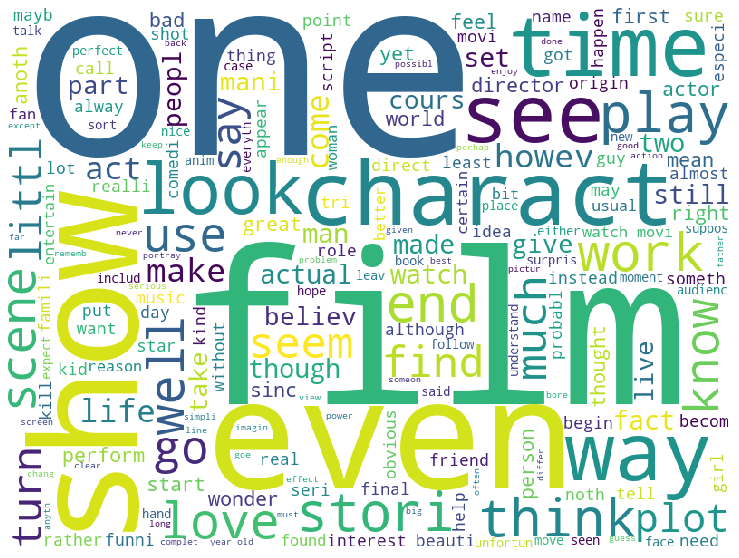

Wall time: 21.4 s


In [30]:
# 학습 데이터의 모든 단어에 대한 워드 클라우드
%time displayWordCloud(' '.join(clean_train_reviews))

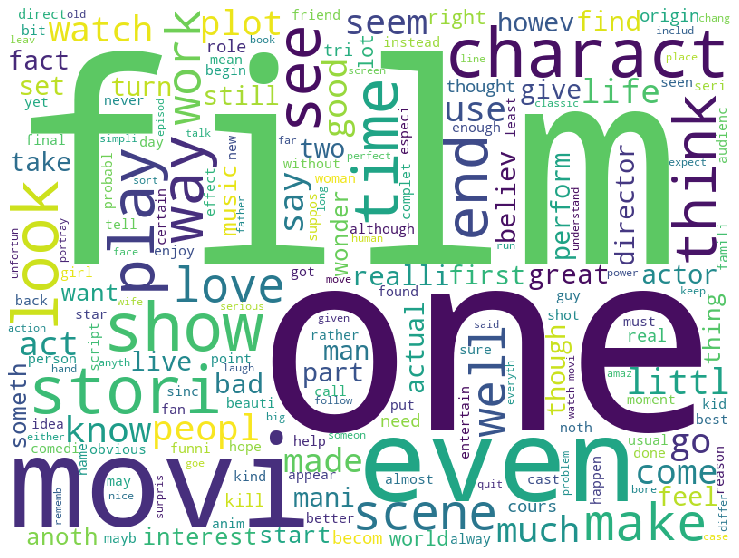

Wall time: 15.6 s


In [33]:
# 테스트 데이터의 모든 단어에 대한 워드 클라우드
%time displayWordCloud(' '.join(clean_test_reviews))